Name: Souvik Ganguly
Project: Housing Prices Prediction of the Boston Residual Areas
Algorithm used: Linear REgression, Random Forest Regression, L2 Regularization

In [201]:
from sklearn.datasets import load_boston
boston=load_boston()
boston.data.shape

(506, 13)

In [202]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [203]:
boston.data

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]])

In [204]:
boston.feature_names

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [205]:
boston.DESCR

".. _boston_dataset:\n\nBoston house prices dataset\n---------------------------\n\n**Data Set Characteristics:**  \n\n    :Number of Instances: 506 \n\n    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.\n\n    :Attribute Information (in order):\n        - CRIM     per capita crime rate by town\n        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.\n        - INDUS    proportion of non-retail business acres per town\n        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)\n        - NOX      nitric oxides concentration (parts per 10 million)\n        - RM       average number of rooms per dwelling\n        - AGE      proportion of owner-occupied units built prior to 1940\n        - DIS      weighted distances to five Boston employment centres\n        - RAD      index of accessibility to radial highways\n        - TAX      full-value property-tax rate per $10,000

In [206]:
import pandas as pd
data=pd.DataFrame(boston.data)
data.head(2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.9,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.9,9.14


In [207]:
data.columns=boston.feature_names
data.head()#adding feature names

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [208]:
data['PRICE']=boston.target

In [209]:
data.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
PRICE      float64
dtype: object

In [210]:
data.nunique()#unique number of values in the dataset

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [211]:
data.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

In [212]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [213]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [214]:
data.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


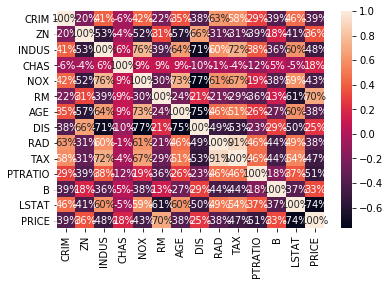

In [215]:
import seaborn as sns
sns.heatmap(data.corr(),annot=True,fmt='.0%')

In [216]:
x=data.drop(['PRICE'],axis=1)
y=data['PRICE']

In [217]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(404, 13)
(102, 13)
(404,)
(102,)


In [218]:
#Linear Regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)
prediction1=lr.predict(x_test)
print(prediction1)

[37.54157616 18.76483601 22.36983893 32.80195443 24.28067045 23.45046273
 18.97004495  7.25837229 20.90563109 17.85625667 13.9909041  31.84086213
 36.06002933 31.32636351  7.69171028 11.84051203 23.47421328 14.89222846
 12.83531594 29.68317709 26.89848085 35.17415212 27.19221597 24.11468978
 13.72103765 24.90234939 20.91816609 19.04157959 19.24815482 24.59866318
 14.91248208 34.33862834 21.63486788 19.51442392 19.44037044 17.93274664
 21.43643542 32.19385315 15.33264981 21.78729365 17.11914571 10.65530927
 25.25887578 17.36938898 23.61750096 25.47691582 26.52763383 18.05278142
 27.89991866 20.44038605 22.56142476 19.31700397 38.05825036 18.59432531
 23.13389736 10.86837032 35.5345575  16.10257158 31.68627765 19.34112466
 24.0016557  22.33684728 32.69725069 33.13643652 21.19554198 25.92317625
 34.3579198  23.85834383 28.44266217 30.40184668 24.87131877 27.30028935
 20.49985311 31.01319689 12.21681845 22.91695321 26.1283221  24.90393823
 22.44821319 19.5255753  26.77496966 19.53931156  8

In [219]:
lr.coef_

array([-1.23897571e-01,  4.81822924e-02, -4.74497796e-02,  3.36938950e+00,
       -1.56635488e+01,  3.59419367e+00, -9.33206067e-03, -1.47089101e+00,
        3.05053544e-01, -1.08397039e-02, -9.08791339e-01,  1.00352939e-02,
       -4.77714677e-01])

In [220]:
lr.intercept_

35.86168334503566

In [221]:
from sklearn.metrics import  mean_squared_error,mean_absolute_error
import numpy as np
rmse=np.sqrt(mean_squared_error(y_test,prediction1)) #root mean squared error rate
print(rmse)

4.116196425564972


In [222]:
mse=mean_squared_error(y_test,prediction1)#mean squared error rate
print(mse)

16.94307301383385


In [223]:
mae=mean_absolute_error(y_test,prediction1)#mean absolute error
print(mae)

3.0142502752403417


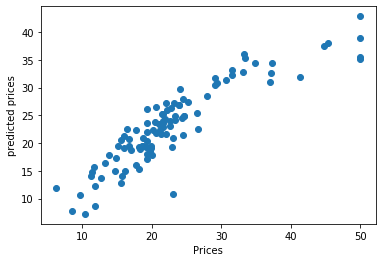

In [224]:
import matplotlib.pyplot as plt
plt.scatter(y_test,prediction1)
plt.xlabel("Prices")
plt.ylabel("predicted prices")
plt.show()

In [225]:
#Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor()
rfc.fit(x_train,y_train)
prediction2=rfc.predict(x_test)
print(prediction2)

[44.524 18.256 19.452 31.335 22.812 20.637 15.33   7.294 20.576 17.386
 15.945 28.89  35.024 26.797  6.427 10.716 20.641 15.402 15.21  23.011
 26.123 44.366 23.233 24.346 11.895 24.169 19.522 20.476 20.073 21.03
 15.451 35.367 20.216 20.662 19.206 12.234 23.795 34.265 20.062 23.373
 15.75   9.25  20.507 15.974 19.863 26.304 21.141 18.804 26.853 19.981
 27.996 20.785 47.77  19.634 20.799 19.897 47.615 14.98  29.345 19.408
 20.385 22.536 31.683 31.564 20.845 22.298 33.774 22.081 27.183 24.493
 24.361 25.732 17.595 30.411 10.597 19.934 20.253 26.522 24.083 15.053
 26.158 14.844 13.053 19.528 24.275 11.598 25.505 11.28  20.625 23.501
 20.223 19.812 21.334 43.323 27.045 15.43  47.467 14.07  21.612 35.582
 21.191 21.177]


In [226]:
rmse1=np.sqrt(mean_squared_error(y_test,prediction2))#root mean squared error
print(rmse1)

2.6845102357566724


In [227]:
mse1=mean_squared_error(y_test,prediction2) #mean squared error
print(mse1)

7.206595205882345


In [228]:
mae1=mean_absolute_error(y_test,prediction2)
print(mae1)

1.9385980392156845


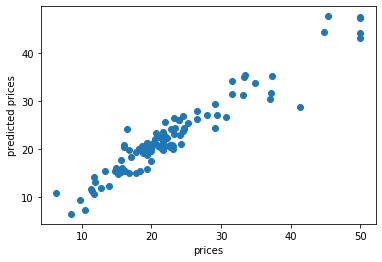

In [229]:
plt.scatter(y_test,prediction2)
plt.xlabel("prices")
plt.ylabel("predicted prices")
plt.show()

In [230]:
#L2 Regularization
from sklearn.linear_model import Ridge
r=Ridge(alpha=0.001)
r.fit(x_train,y_train)
prediction3=r.predict(x_test)
print(prediction3)

[37.54125923 18.76502615 22.37062668 32.8016351  24.28070118 23.45075418
 18.97094104  7.25818539 20.9069285  17.85482877 13.98981421 31.8401747
 36.05948853 31.3269023   7.69195955 11.8406298  23.47395425 14.89228674
 12.8353975  29.68260052 26.8990992  35.17369389 27.19178651 24.1143714
 13.72179002 24.90330399 20.91747424 19.04170548 19.24873346 24.59818931
 14.91282062 34.33859355 21.63436699 19.51415207 19.43956789 17.93264387
 21.4364915  32.19378955 15.33410011 21.78865388 17.12143689 10.65537727
 25.25773723 17.3702442  23.61884448 25.47712327 26.52687036 18.05143301
 27.90052021 20.44017897 22.56254372 19.31735446 38.05754987 18.59440181
 23.1353886  10.86742336 35.53406501 16.10261766 31.68599281 19.34140494
 24.00089152 22.33678099 32.6972759  33.13638829 21.19469648 25.9226963
 34.35832312 23.85791265 28.44265132 30.40152145 24.87162991 27.29969021
 20.50211103 31.01312893 12.21748676 22.91580905 26.12764853 24.90656189
 22.44889819 19.52620029 26.77447127 19.53995385  8.62

In [231]:
rmse3=np.sqrt(mean_squared_error(y_test,prediction3)) #root mean squared error
print(rmse3)

4.116288770578424


In [232]:
mse3=mean_squared_error(y_test,prediction3) #mean squared error
print(mse3)

16.94383324279003


In [233]:
mae3=mean_absolute_error(y_test,prediction3) #mean absolute error
print(mae3)

3.014308499795233


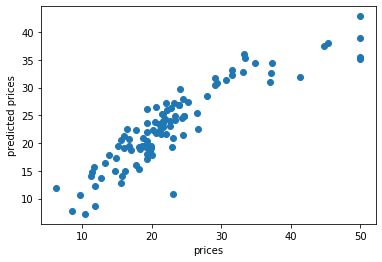

In [234]:
plt.scatter(y_test,prediction3)
plt.xlabel("prices")
plt.ylabel("predicted prices")
plt.show()

In [235]:
model1=pd.DataFrame({'Model':['Linear Regression','Random Forest Regressor','L2 Regularization'],
                   'Root_Mean_Square_error':[rmse,rmse1,rmse3]})
print(model1)

                     Model  Root_Mean_Square_error
0        Linear Regression                4.116196
1  Random Forest Regressor                2.684510
2        L2 Regularization                4.116289


In [236]:
model2=pd.DataFrame({'Model':['Linear Regression','Random Forest Regressor','L2 Regularization'],
                   'Mean_Square_error':[mse,mse1,mse3]})
print(model2)

                     Model  Mean_Square_error
0        Linear Regression          16.943073
1  Random Forest Regressor           7.206595
2        L2 Regularization          16.943833


In [237]:
model3=pd.DataFrame({'Model':['Linear Regression','Random Forest Regressor','L2 Regularization'],
                   'Mean_Absolute_error':[mae,mae1,mae3]})
print(model3)

                     Model  Mean_Absolute_error
0        Linear Regression             3.014250
1  Random Forest Regressor             1.938598
2        L2 Regularization             3.014308


In [238]:
r2_score1=metrics.r2_score(y_test,prediction1)# for linear regression model
print(r2_score1*100)

79.5261756324385


In [239]:
r2_score2=metrics.r2_score(y_test,prediction2)# for Random Forest regression model
print(r2_score2*100)

91.2916290679456


In [240]:
r2_score3=metrics.r2_score(y_test,prediction3)# for Regularization model
print(r2_score3*100)

79.52525698007152


In [241]:
model4=pd.DataFrame({'Model':['Linear Regression','Random Forest Regressor','L2 Regularization'],
                   'R_Squared_score':[r2_score1*100,r2_score2*100,r2_score3*100]})
print(model4)

                     Model  R_Squared_score
0        Linear Regression        79.526176
1  Random Forest Regressor        91.291629
2        L2 Regularization        79.525257
